#### <h1>Capstone week 4 assignment by Roy Lachica</h1> 

We will analyse different boroughs in Oslo Norway and check correlations between depression and factors such as 
* Share of borough population with high income
* Share of borough population with low income
* Share of borough population with high education level
* Share of borough population on social security among population age 50-59.
* Living distance to nature, parks, outdoor and green areas.
* Number of foursquare venues




**First import some required libraries**

In [3]:
import pandas as pd
import numpy as np
import requests

**Define locations and nature access scores for each borough as I could not find online datasets for it.**

In [20]:
boroughs_array = np.array([
    ["Alna","59.935015","10.881657",40],
    ["Bjerke","59.937422","10.821668",30],
    ["Frogner","59.916131","10.706230",25],
    ["Gamle Oslo","59.910543","10.765616",25],  
    ["Grorud","59.957500","10.880833",60],    
    ["Grünerløkka","59.924934","10.770492",20],    
    ["Nordre Aker","59.9572374","10.76628",53],
    ["Nordstrand","59.861111","10.800278",37],
    ["Sagene","59.937222","10.756111",24],
    ["St. Hanshaugen","59.927106","10.741061",26],
    ["Stovner","59.961111","10.926667",42],
    ["Søndre Nordstrand","59.832958","10.819148",49],
    ["Ullern","59.928551","10.662471",24],
    ["Vestre Aker","59.943003","10.658020",63],
    ["Østensjø","59.888889","10.833611",64],
    ["Sentrum","59.910820","10.739924",14]   
])
boroughs_array.shape

(16, 4)

**Convert array to dataframe and do some cleaning of bouroughs data including defining column headers etc.**

In [21]:
boroughs = pd.DataFrame({'Borough': boroughs_array[:, 0], 'Latitude': boroughs_array[:, 1], 'Longitude': boroughs_array[:, 2], 'Nature': boroughs_array[:, 3]})
boroughs["Latitude"] = pd.to_numeric(boroughs["Latitude"])
boroughs["Longitude"] = pd.to_numeric(boroughs["Longitude"])
boroughs["Nature"] = pd.to_numeric(boroughs["Nature"])
boroughs.set_index('Borough')
boroughs

,Borough,Latitude,Longitude,Nature
0,Alna,59.935015,10.881657,40
1,Bjerke,59.937422,10.821668,30
2,Frogner,59.916131,10.706230,25
3,Gamle Oslo,59.910543,10.765616,25
4,Grorud,59.957500,10.880833,60
5,Grünerløkka,59.924934,10.770492,20
6,Nordre Aker,59.957237,10.766280,53
7,Nordstrand,59.861111,10.800278,37
8,Sagene,59.937222,10.756111,24
9,St. Hanshaugen,59.927106,10.741061,26


**Load data on education for boroughs**

In [65]:
education_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=Utdanning&Geografisubset=30100%2C30101+-+30118&stubs=Geografi&Utdanningslice=10&measure=common&virtualslice=Antall_value&layers=r&layers=Kjnn&layers=Alder&layers=virtual&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2FBefokningen-etter-alder-kjonn-utdanning-2017&Aldersubset=7&Alderslice=7&mode=cube&Geografislice=30100&virtualsubset=Antall_value&v=2&rsubset=2018&measuretype=4&Kjnnsubset=3&rslice=2018&cube=http%3A%2F%2Fstatistikkbanken.oslo.kommune.no%3A80%2Fobj%2FfCube%2FBefokningen-etter-alder-kjonn-utdanning-2017_C1&Utdanningsubset=10%2C4&Kjnnslice=3&top=yes&executespreadsheet=true"
education = pd.read_excel(education_path,skiprows=11,names=["Borough","TotalEducation","TopEducation"])
education.replace({'Bydel ':''}, regex=True,inplace=True)
education['Borough'] = education['Borough'].str.strip()
educationShare = education
educationShare['PctTopEducation'] = (educationShare['TopEducation'] / educationShare['TotalEducation']) *100
educationShare.set_index('Borough')
educationShare.head()

,Borough,TotalEducation,TopEducation,PctTopEducation
0,Gamle Oslo,47023,10154,21.593688
1,Grünerløkka,52740,12098,22.938946
2,Sagene,38035,10186,26.780597
3,St. Hanshaugen,34059,9418,27.652016
4,Frogner,52624,14278,27.132107


**Load data on top income for boroughs**

In [66]:
income_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=innt_num&stubs=geografi&innt_numslice=1&measure=common&geografislice=30101&virtualslice=brutto_sum_value&layers=kjonn_num&layers=virtual&layers=aar&aarslice=2017&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2Finntektintervall-ny&kjonn_numslice=1&mode=cube&innt_numsubset=1%2C18&virtualsubset=brutto_sum_value&v=2&aar=2017&kjonn_numsubset=1&aarsubset=2007+-+2017&geografisubset=30101+-+30115&measuretype=4&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2Finntektintervall-ny_C1&top=yes&executespreadsheet=true"
income = pd.read_excel(income_path,skiprows=9,names=["Borough","TotalIncome","TopIncome"])
income.replace({'Bydel ':''}, regex=True,inplace=True)
income['Borough'] = income['Borough'].str.strip()
incomeShare = income
incomeShare['PctTopIncome'] = (incomeShare['TopIncome'] / incomeShare['TotalIncome']) *100
incomeShare.set_index('Borough')
incomeShare.head()

,Borough,TotalIncome,TopIncome,PctTopIncome
0,Gamle Oslo,27431,3241,11.815100
1,Grünerløkka,28192,3751,13.305193
2,Sagene,20390,3162,15.507602
3,St Hanshaugen,17231,3271,18.983228
4,Frogner,25006,7045,28.173238


**Load data on security benefits for boroughs**

In [68]:
sociaSecurityAge50to59_path='http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=r&Geografisubset=30101+-+30115&stubs=Geografi&measure=common&virtualslice=Antallpersoner_value&layers=Kjnn&layers=virtual&layers=Alder&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2Fufrepensjonister-antall-bydel-kjnn-alder31.12&Aldersubset=1%2C4&Alderslice=5&mode=cube&Geografislice=30101&virtualsubset=Antallpersoner_value&v=2&rsubset=2018&Alder=5&measuretype=4&rslice=2018&Kjnnsubset=1&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2Fufrepensjonister-antall-bydel-kjnn-alder31.12_C1&Kjnnslice=1&top=yes&executespreadsheet=true'
sociaSecurityAge50to59 = pd.read_excel(sociaSecurityAge50to59_path,skiprows=9,names=["Borough","SocialSec"])
sociaSecurityAge50to59.replace({'Bydel ':''}, regex=True,inplace=True)
sociaSecurityAge50to59.set_index('Borough')
sociaSecurityAge50to59.head()

,Borough,SocialSec
0,Gamle Oslo,827
1,Grünerløkka,711
2,Sagene,647
3,St.Hanshaugen,354
4,Frogner,559


**Load number of inhabitants total age 50 to 59 so we can calculate percentage**

In [70]:
populationAge50to59_path='http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=Alder&Bydelsubset=30101+-+30116&stubs=Bydel&measure=common&virtualslice=Antall_value&layers=Kjnn&layers=virtual&layers=r&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2FBe01-Befolkningen-etter-bydel-kjonn-og-alder-SSB&Aldersubset=50+-+59&Alderslice=50&mode=cube&virtualsubset=Antall_value&v=2&r=2018&rsubset=2004+-+2020&measuretype=4&Kjnnsubset=3&rslice=2018&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2FBe01-Befolkningen-etter-bydel-kjonn-og-alder-SSB_C1&Kjnnslice=3&Bydelslice=30101&top=yes&executespreadsheet=true'
populationAge50to59 = pd.read_excel(populationAge50to59_path,skiprows=9)
populationAge50to59.head()

,Bydel,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Bydel Gamle Oslo,613,592,580,575,502,523,476,457,398,439
1,Bydel Grünerløkka,526,540,457,499,476,453,391,382,378,348
2,Bydel Sagene,354,392,386,349,347,313,307,310,279,278
3,Bydel St.Hanshaugen,365,391,321,322,308,329,285,264,289,263
4,Bydel Frogner,701,689,690,666,657,663,570,614,595,560


Create new column with sum of all ages

In [71]:
populationAge50to59["sum"]=populationAge50to59.sum(axis=1)
populationAge50to59.head()

,Bydel,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,sum
0,Bydel Gamle Oslo,613,592,580,575,502,523,476,457,398,439,5155
1,Bydel Grünerløkka,526,540,457,499,476,453,391,382,378,348,4450
2,Bydel Sagene,354,392,386,349,347,313,307,310,279,278,3315
3,Bydel St.Hanshaugen,365,391,321,322,308,329,285,264,289,263,3137
4,Bydel Frogner,701,689,690,666,657,663,570,614,595,560,6405


Clean up and remove all but the last sum column that we need 

In [72]:
populationAge50to59.replace({'Bydel ':''}, regex=True,inplace=True)
populationAge50to59Cleaned = populationAge50to59.loc[:, ~populationAge50to59.columns.str.contains('^Unnamed')]
populationAge50to59Cleaned.rename(columns={"Bydel": "Borough"},inplace=True)
populationAge50to59Cleaned.set_index('Borough')
populationAge50to59Cleaned.head()

,Borough,sum
0,Gamle Oslo,5155
1,Grünerløkka,4450
2,Sagene,3315
3,St.Hanshaugen,3137
4,Frogner,6405


In [73]:
socialSecWithPopulation = pd.merge(sociaSecurityAge50to59, populationAge50to59Cleaned, on='Borough')
socialSecWithPopulation['PctSocialSec'] = (socialSecWithPopulation['SocialSec'] / socialSecWithPopulation['sum']) *100
socialSecWithPopulation.drop(columns=['SocialSec', 'sum'],inplace=True)
socialSecWithPopulation.set_index('Borough')
socialSecWithPopulation.head()

,Borough,PctSocialSec
0,Gamle Oslo,16.042677
1,Grünerløkka,15.977528
2,Sagene,19.517345
3,St.Hanshaugen,11.284667
4,Frogner,8.727557


**Load data on low income for boroughs**

In [77]:
lowincome_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?Geografisubset=30101+-+30118&stubs=Geografi&measure=common&virtualslice=AndeletterEUskala_value&layers=Husholdningstype&layers=virtual&layers=r&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2Fhusholdningerfattig&mode=cube&Geografislice=30101&virtualsubset=AndeletterEUskala_value&v=2&Husholdningstypesubset=1&r=2017&rsubset=2008+-+2017&measuretype=4&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2Fhusholdningerfattig_C1&rslice=2017&Husholdningstypeslice=1&top=yes&executespreadsheet=true"
lowincomeShare = pd.read_excel(lowincome_path,skiprows=8,names=["Borough","PctLowIncome"])
lowincomeShare.replace({'Bydel ':''}, regex=True,inplace=True)
lowincomeShare['Borough'] = lowincomeShare['Borough'].str.strip()
lowincomeShare.set_index('Borough')
lowincomeShare.head()

,Borough,PctLowIncome
0,Gamle Oslo,21.7
1,Grünerløkka,20.6
2,Sagene,17.1
3,St Hanshaugen,20.9
4,Frogner,19.0


**Load data on depression for boroughs**

In [75]:
depression_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=r&virtualsubset=Andel_value&v=2&stubs=Region&measure=common&virtualslice=Andel_value&Regionsubset=0301%2C030101a+-+030115a&rsubset=2015&layers=virtual&measuretype=4&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2FDepresjonsplager%21hos%21unge%21etter%21bydel&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2FDepresjonsplager%21hos%21unge%21etter%21bydel_C1&mode=cube&top=yes&executespreadsheet=true"
depressionShare = pd.read_excel(depression_path,skiprows=8,names=["Borough","PctDepression"])
depressionShare['Borough'] = depressionShare['Borough'].str.strip()
depressionShare.set_index('Borough')
depressionShare.head()

,Borough,PctDepression
0,Gamle Oslo,18.0
1,Grunerløkka,18.8
2,Sagene,21.2
3,St. Hanshaugen,15.9
4,Frogner,19.0


# Merge datasets

**Merge set by set to see progress**

In [54]:
incomeAndEducation = pd.merge(incomeShare, educationShare, on='Borough')
incomeAndEducation.drop(columns=['TotalIncome', 'TotalEducation','TopEducation','TopIncome'],inplace=True)
incomeAndEducation.set_index('Borough')
incomeAndEducation.head()

,Borough,PercentTopIncome,PercentTopEducation
0,Gamle Oslo,11.815100,21.593688
1,Grünerløkka,13.305193,22.938946
2,Sagene,15.507602,26.780597
3,Frogner,28.173238,27.132107
4,Ullern,37.801746,29.239422


In [64]:
incomeEducationDepression =  pd.merge(incomeAndEducation, depressionShare, on='Borough') 
incomeEducationDepressionSocialSec =  pd.merge(incomeEducationDepression, socialSecWithPopulation, on='Borough')
incomeHighLowEducationDepressionSocialSec =  pd.merge(incomeEducationDepressionSocialSec,lowincomeShare, on='Borough')

incomeHighLowEducationDepressionSocialSec.head()

,Borough,PercentTopIncome,PercentTopEducation,PercentDepression,PercentSocialSec,PercentLowIncome
0,Gamle Oslo,11.815100,21.593688,18.0,8.021339,21.7
1,Sagene,15.507602,26.780597,21.2,9.758673,17.1
2,Frogner,28.173238,27.132107,19.0,4.363778,19.0
3,Ullern,37.801746,29.239422,15.2,3.232446,11.4
4,Vestre Aker,37.941990,29.383062,13.8,3.600414,13.7


In [17]:
boroughsCombined = incomeEducationDepressionSocialSec.join(boroughs.set_index('Borough'), on='Borough')
boroughsCombined.head()

,Borough,PercentTopIncome,PercentTopEducation,PercentDepression,Latitude,Longitude,Nature
0,Sagene,15.507602,26.780597,21.2,59.937222,10.756111,24
1,Frogner,28.173238,27.132107,19.0,59.916131,10.706230,25
2,Ullern,37.801746,29.239422,15.2,59.928551,10.662471,24
3,Vestre Aker,37.941990,29.383062,13.8,59.943003,10.658020,63
4,Nordre Aker,31.337943,28.135470,15.7,59.957237,10.766280,53
5,Bjerke,12.362695,14.846027,17.0,59.937422,10.821668,30
6,Grorud,6.679993,8.668841,16.8,59.957500,10.880833,60
7,Stovner,7.620622,6.623481,15.3,59.961111,10.926667,42
8,Alna,7.106310,9.252561,17.4,59.935015,10.881657,40
9,Østensjø,15.376564,14.985267,15.9,59.888889,10.833611,64


**Setup some colors we will be using in the map below.**

In [18]:
def color(value): 
    if value <18: 
        col = '#ff6600'
    elif value <19: 
        col = '#ff9900'
    elif value <20: 
        col = '#ffaa00'
    else: 
        col='#ff0000'
    return col 

**Install folium library required to display map**

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Read lat long data for postal areas

In [19]:
# create map of Oslo 
map_oslo = folium.Map(location=[59.89,10.9], zoom_start=11, width=1100, height=700)

# add markers to map
for lat, lng, borough,depression in zip(boroughsCombined['Latitude'], boroughsCombined['Longitude'], boroughsCombined['Borough'], boroughsCombined['PercentDepression']):
    label = '{} ({}% depression level)'.format(borough,depression)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        stroke=True,
        weight=1,
        popup=label,
        color='black',
        fill_color=color(depression),
        fill=True,       
        fill_opacity=0.9,
        parse_html=False).add_to(map_oslo)      


In [20]:
map_oslo

## Explore Neighborhoods in Oslo

In [18]:
# @hidden_cell
CLIENT_ID = 'UZ4O1W2MKFB5EAQ5E3BCTNHWSKJOK01U2QWLZNAUHRVDJBSO' # your Foursquare ID
CLIENT_SECRET = '3PEYBVMJCOSVQUVO2RHYEEEBK1CZOM2HEUUTENBR5KGJDHA0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

Create a function to repeat the same process to all the boroughs in Oslo

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
venues = getNearbyVenues(names=boroughsCombined['Borough'],
                                   latitudes=boroughsCombined['Latitude'],
                                   longitudes=boroughsCombined['Longitude']
                                  )

Sagene
Frogner
Ullern
Vestre Aker
Nordre Aker
Bjerke
Grorud
Stovner
Alna
Østensjø
Nordstrand
Søndre Nordstrand


Check the size of the resulting dataframe

In [22]:
print(venues.shape)
venues.head()

(138, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sagene,59.937222,10.756111,Mysterud Bar,59.937574,10.755505,Bar
1,Sagene,59.937222,10.756111,Sagene Torg,59.937919,10.754910,Deli / Bodega
2,Sagene,59.937222,10.756111,Klatreverket,59.935141,10.759219,Climbing Gym
3,Sagene,59.937222,10.756111,Myrens Sportssenter,59.934832,10.759601,Gym
4,Sagene,59.937222,10.756111,Kaffe Gram,59.937677,10.751595,Coffee Shop


Check how many venues were returned for each neighborhood

In [23]:
venue_count= venues.groupby('Borough').count()

Check how many unique categories can be curated from all the returned venues

In [24]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 59 uniques categories.


Setup dataframe for number of vanues by borough

In [25]:
venue_count.reset_index(inplace=True)
venue_count = venue_count[['Borough','Venue']]
venue_count.rename(columns={"Venue": "Venues"},inplace=True)
venue_count

,Borough,Venue
0,Alna,6
1,Bjerke,5
2,Frogner,43
3,Grorud,9
4,Nordre Aker,4
5,Nordstrand,17
6,Sagene,34
7,Stovner,4
8,Søndre Nordstrand,3
9,Ullern,6


In [26]:
citybike_url='https://gbfs.urbansharing.com/oslobysykkel.no/station_information.json'




,Borough,Venues
0,Alna,6
1,Bjerke,5
2,Frogner,43
3,Grorud,9
4,Nordre Aker,4
5,Nordstrand,17
6,Sagene,34
7,Stovner,4
8,Søndre Nordstrand,3
9,Ullern,6


## Stitch together datasets

**Merge the data with our boroughs dataset and fix the Neighbourhood column name so it can be merged again later on column key with correct name**

In [34]:
venues_complete =  pd.merge(boroughsCombined, venue_count, on='Borough') 
venues_complete

,Borough,PercentTopIncome,PercentTopEducation,PercentDepression,Latitude,Longitude,Nature,Venues
0,Sagene,15.507602,26.780597,21.2,59.937222,10.756111,24,34
1,Frogner,28.173238,27.132107,19.0,59.916131,10.706230,25,43
2,Ullern,37.801746,29.239422,15.2,59.928551,10.662471,24,6
3,Vestre Aker,37.941990,29.383062,13.8,59.943003,10.658020,63,7
4,Nordre Aker,31.337943,28.135470,15.7,59.957237,10.766280,53,4
5,Bjerke,12.362695,14.846027,17.0,59.937422,10.821668,30,5
6,Grorud,6.679993,8.668841,16.8,59.957500,10.880833,60,9
7,Stovner,7.620622,6.623481,15.3,59.961111,10.926667,42,4
8,Alna,7.106310,9.252561,17.4,59.935015,10.881657,40,6
9,Nordstrand,28.337258,18.625884,18.1,59.861111,10.800278,37,17


## Analyse data

Explore correlations by setting up a correlation matrix.  
But first remove geo data that would not be useful in the matrix.

In [35]:
venues_complete_noGeo = venues_complete
venues_complete_noGeo.drop(columns=['Latitude', 'Longitude',],inplace=True)
venues_complete_noGeo.corr(method ='pearson') 

,PercentTopIncome,PercentTopEducation,PercentDepression,Nature,Venues
PercentTopIncome,1.000000,0.884354,-0.339805,-0.063236,0.160756
PercentTopEducation,0.884354,1.000000,-0.012646,-0.238994,0.418842
PercentDepression,-0.339805,-0.012646,1.000000,-0.559303,0.729048
Nature,-0.063236,-0.238994,-0.559303,1.000000,-0.543226
Venues,0.160756,0.418842,0.729048,-0.543226,1.000000


Investigate correlations further.

In [43]:
from scipy.stats import pearsonr


In [127]:
pearsonr(venues_complete_noGeo["PctTopIncome"], venues_complete_noGeo["PctNoDepression"])

(0.3398051932642691, 0.306584958980134)

Check the new size

In [128]:
pearsonr(venues_complete_noGeo["PctTopEducation"], venues_complete_noGeo["PctDepression"])

(0.012645530812079753, 0.9705640475895232)

In [134]:
pearsonr(venues_complete_noGeo["Venues"], venues_complete_noGeo["PctDepression"])

(-0.7276884312576217, 0.011135681545710055)

**Import seaborn which is really nice for plotting correlation with trendline**


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Check correlation between depression and top education**

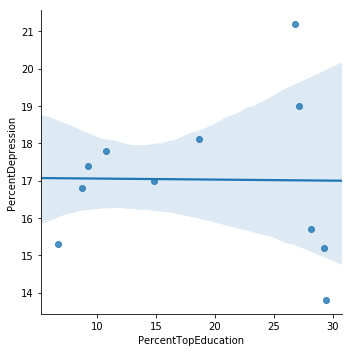

In [56]:
sns.lmplot(x="PctTopEducation", y="PctDepression", data=venues_complete_noGeo);

**Check correlation between depression and top income**

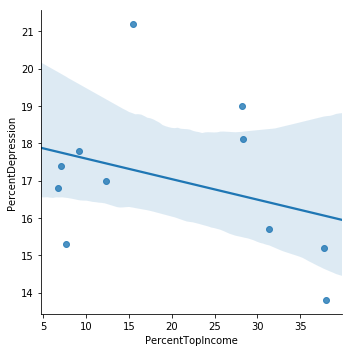

In [55]:
sns.lmplot(x="PctTopIncome", y="PctDepression", data=venues_complete_noGeo);

**Check correlation between depression and Foursquare venues**

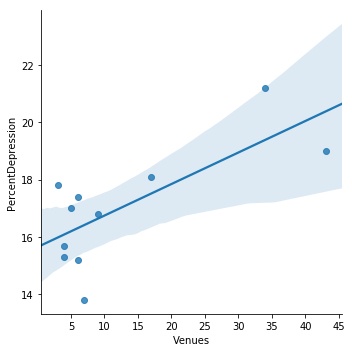

In [54]:
sns.lmplot(x="Venues", y="PctDepression", data=venues_complete_noGeo);

**Check correlation between depression and access to nature**

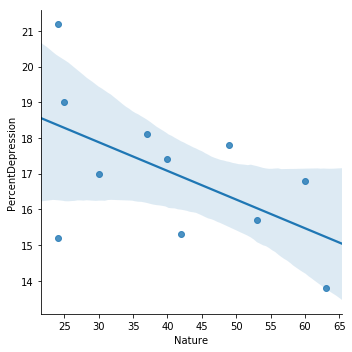

In [53]:
sns.lmplot(x="Nature", y="PctDepression", data=venues_complete_noGeo);

In [44]:
pearsonr(venues_complete_noGeo["Nature"], venues_complete_noGeo["PctDepression"])

(-0.5593025667059138, 0.07363251833667041)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

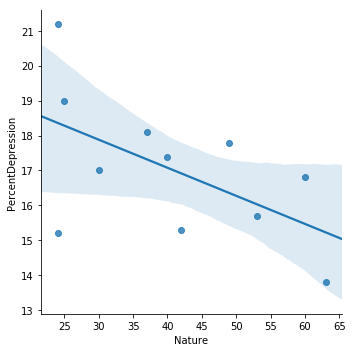

Visualize the resulting clusters

## Examine Clusters

#### Cluster 1

In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,East Toronto,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Bookstore,Furniture / Home Store,Ice Cream Shop,Dessert Shop,Diner,Pub,Caribbean Restaurant
42,East Toronto,0,Sandwich Place,Pizza Place,Burrito Place,Sushi Restaurant,Fish & Chips Shop,Brewery,Ice Cream Shop,Pub,Movie Theater,Italian Restaurant
43,East Toronto,0,Café,Coffee Shop,American Restaurant,Gastropub,Italian Restaurant,Brewery,Bakery,Bar,Stationery Store,Fish Market
45,Central Toronto,0,Department Store,Park,Food & Drink Shop,Hotel,Sandwich Place,Breakfast Spot,Gym,Electronics Store,Eastern European Restaurant,Dim Sum Restaurant
46,Central Toronto,0,Clothing Store,Coffee Shop,Yoga Studio,Spa,Shoe Store,Salon / Barbershop,Café,Restaurant,Chinese Restaurant,Pet Store
47,Central Toronto,0,Dessert Shop,Sandwich Place,Pizza Place,Café,Gym,Italian Restaurant,Sushi Restaurant,Coffee Shop,Deli / Bodega,Indoor Play Area
49,Central Toronto,0,Coffee Shop,Pub,Light Rail Station,American Restaurant,Restaurant,Liquor Store,Fried Chicken Joint,Sports Bar,Supermarket,Sushi Restaurant
51,Downtown Toronto,0,Coffee Shop,Park,Café,Restaurant,Italian Restaurant,Bakery,Pizza Place,Pub,Gastropub,Diner
52,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Café,Fast Food Restaurant,Pub,Gym,Hotel
53,Downtown Toronto,0,Coffee Shop,Pub,Park,Bakery,Theater,Café,Breakfast Spot,Restaurant,Mexican Restaurant,Ice Cream Shop


#### Cluster 2

In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Central Toronto,1,Playground,Tennis Court,Park,Restaurant,Women's Store,Discount Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant
50,Downtown Toronto,1,Park,Trail,Playground,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store


#### Cluster 3

In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Central Toronto,2,Photography Studio,Park,Construction & Landscaping,Swim School,Bus Line,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


#### Cluster 4

In [63]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Central Toronto,3,Pool,Garden,Women's Store,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 5

In [64]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,4,Trail,Pub,Health Food Store,Other Great Outdoors,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store
